In [1]:
import pandas as pd
import numpy as np

In [2]:
fifa_data = pd.read_csv('fifa21_train.csv')

## Cleaning Data
-> Create a new file fifa2 to drop useless column

-> Delete the ★

-> Force object-types columns with number into numerical columns

-> Delete the + and its value after

-> Fill the na values = we decided for the mean values

In [3]:
fifa_data.shape

(11701, 101)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# set ups to show all columns and rows

In [5]:
fifa_data.head(5)

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [6]:
fifa2= fifa_data.drop(['Name', 'Nationality','Club', 'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Position','Release Clause', 'Contract', 'Wage', 'Value', 'A/W', 'D/W'], axis=1)

In [7]:
fifa2.shape

(11701, 84)

In [8]:
fifa2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11701 entries, 0 to 11700
Data columns (total 84 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11701 non-null  int64  
 1   Age               11701 non-null  int64  
 2   BP                11701 non-null  object 
 3   Attacking         11701 non-null  int64  
 4   Crossing          11701 non-null  int64  
 5   Finishing         11701 non-null  int64  
 6   Heading Accuracy  11701 non-null  int64  
 7   Short Passing     11701 non-null  int64  
 8   Volleys           11660 non-null  float64
 9   Skill             11701 non-null  int64  
 10  Dribbling         11701 non-null  int64  
 11  Curve             11660 non-null  float64
 12  FK Accuracy       11701 non-null  int64  
 13  Long Passing      11701 non-null  int64  
 14  Ball Control      11701 non-null  int64  
 15  Movement          11701 non-null  int64  
 16  Acceleration      11701 non-null  int64 

In [9]:
def remove_star(x):
    x = x.replace('★', '')
    return x

In [10]:
fifa2['W/F'] = fifa2['W/F'].apply(remove_star)
fifa2['IR'] = fifa2['IR'].apply(remove_star)
fifa2['SM'] = fifa2['SM'].apply(remove_star)

In [11]:
fifa2['W/F'] =  pd.to_numeric(fifa2['W/F'], errors='coerce')
fifa2['IR'] =  pd.to_numeric(fifa2['IR'], errors='coerce')
fifa2['SM'] =  pd.to_numeric(fifa2['SM'], errors='coerce')
fifa2['Hits'] =  pd.to_numeric(fifa2['Hits'], errors='coerce')
fifa2['Hits'].dtypes

dtype('float64')

In [12]:
fifa2.head(5)

,ID,Age,BP,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,26,CM,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,1,69,51,63,63,51,60,3.0,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,30,ST,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,2,83,75,68,82,33,71,44.0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,33,CAM,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,2,80,77,78,86,27,56,73.0,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,22,CDM,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,1,57,44,54,57,57,60,7.0,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,23,CDM,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,1,66,44,60,64,60,66,4.0,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [13]:
def extract_and_replace_numeric(fifa2, columns):
    for column in columns:
        # Extract the first number from each string using a regular expression
        fifa2[column] = fifa2[column].str.extract('(\d+)')
        # Convert the column to numeric type
        fifa2[column] = pd.to_numeric(fifa2[column])
columns_to_process = ["LS", "ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB","GK"]

# Call the function to extract and replace numeric values in specified columns
extract_and_replace_numeric(fifa2, columns_to_process)
fifa2.head(5)

,ID,Age,BP,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,26,CM,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,1,69,51,63,63,51,60,3.0,58,58,58,61,62,62,62,61,63,63,63,63,63,63,63,63,59,59,59,59,59,58,54,54,54,58,15,64
1,188044,30,ST,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,2,83,75,68,82,33,71,44.0,77,77,77,77,77,77,77,77,76,76,76,76,68,68,68,76,57,53,53,53,57,53,48,48,48,53,18,77
2,184431,33,CAM,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,2,80,77,78,86,27,56,73.0,73,73,73,80,79,79,79,80,80,80,80,79,74,74,74,79,59,56,56,56,59,53,41,41,41,53,12,80
3,233796,22,CDM,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,1,57,44,54,57,57,60,7.0,50,50,50,51,51,51,51,51,53,53,53,53,56,56,56,53,56,58,58,58,56,57,58,58,58,57,14,59
4,234799,23,CDM,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,1,66,44,60,64,60,66,4.0,56,56,56,59,59,59,59,59,61,61,61,62,63,63,63,62,64,64,64,64,64,63,61,61,61,63,15,65


In [14]:
fifa2.describe()

,ID,Age,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
count,11701.000000,11701.00000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11660.000000,11701.000000,11701.000000,11660.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11660.000000,11701.000000,11660.000000,11701.000000,11701.000000,11660.000000,11701.000000,11701.00000,11701.000000,11701.000000,11701.000000,11694.000000,11694.000000,11660.000000,11701.000000,11422.000000,11701.000000,11701.000000,11701.000000,11660.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11659.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000
mean,219436.649004,25.27049,258.482181,51.593795,48.048116,53.494060,60.436800,45.067324,266.497222,57.852491,49.617839,44.358260,54.214683,60.627810,322.617383,65.432527,65.446628,64.582075,62.899838,64.709348,302.083326,59.726348,65.036621,63.214939,65.17084,49.162465,261.704982,56.939065,46.815119,52.485890,55.439194,50.279378,59.947732,140.674558,46.964875,48.042560,45.827702,77.726946,15.604906,15.517734,15.494402,15.543458,15.768310,1629.786599,361.106316,2.982907,2.452782,1.148192,68.095206,55.046406,58.893257,64.223229,50.030254,64.817964,28.698773,56.477310,56.477310,56.477310,57.505598,57.397915,57.397915,57.397915,57.505598,57.687719,57.687719,57.687719,58.120075,56.724981,56.724981,56.724981,58.120075,55.089907,54.677720,54.677720,54.677720,55.089907,54.274421,53.117768,53.117768,53.117768,54.274421,20.765405,66.921972
std,37480.006004,4.95764,72.267012,17.872747,19.399617,16.956195,13.971811,17.732902,76.835287,18.050938,18.180408,17.484142,14.886875,15.886688,55.330054,14.735329,14.516404,14.484351,9.020199,14.131318,49.697749,13.511767,12.017118,15.350014,12.76541,19.058991,62.935298,17.066535,20.808153,19.069465,13.695285,15.713965,11.769872,61.599006,20.190466,21.470841,21.217062,81.221525,16.850815,16.155245,16.005114,16.409881,17.151738,260.766470,40.318331,0.675365,0.782346,0.451875,11.247282,13.851853,10.174939,9.818311,16.841283,9.757873,76.428496,13.067338,13.067338,13.067338,14.057242,13.693624,13.693624,13.693624,14.057242,13.548592,13.548592,13.548592,13.505062,12.737545,12.737545,12.737545,13.505062,13.257255,13.490103,13.490103,13.490103,13.257255,13.542058,14.575321,14.575321,14.575321,13.542058,14.606704,6.876081
min,27.000000,16.00000,33.000000,6.000000,3.000000,5.000000,8.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,13.000000,11.000000,14.000000,24.000000,17.000000,133.000000,12.000000,25.000000,12.000000,20.00000,4.000000,55.000000,9.000000,5.000000,2.000000,10.000000,8.000000,12.000000,17.000000,3.000000,6.000000,6.000000,12.000000,1.000000,2.000000,2.000000,2.000000,1.000000,731.000000,228.000000,1.000000,1.000000,1.000000,26.000000,17.000000,25.000000,28.000000,12.000000,27.000000,3.000000,15.000000,15.000000,15.000000,14.000000,15.000000,15.000000,15.000000,14.000000,16.000000,16.000000,16.000000,15.

In [15]:
print(fifa2['Volleys'].mode())
print(fifa2['Curve'].mode())
print(fifa2['Agility'].mode())
print(fifa2['Balance'].mode())

0    49.0
Name: Volleys, dtype: float64
0    55.0
Name: Curve, dtype: float64
0    68.0
Name: Agility, dtype: float64
0    65.0
Name: Balance, dtype: float64


In [16]:
fifa2.isna().sum()

ID                    0
Age                   0
BP                    0
Attacking             0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys              41
Skill                 0
Dribbling             0
Curve                41
FK Accuracy           0
Long Passing          0
Ball Control          0
Movement              0
Acceleration          0
Sprint Speed          0
Agility              41
Reactions             0
Balance              41
Power                 0
Shot Power            0
Jumping              41
Stamina               0
Strength              0
Long Shots            0
Mentality             0
Aggression            0
Interceptions         7
Positioning           7
Vision               41
Penalties             0
Composure           279
Defending             0
Marking               0
Standing Tackle       0
Sliding Tackle       41
Goalkeeping           0
GK Diving             0
GK Handling           0
GK Kicking      

In [17]:
columns_to_replace_nan =['Hits', "Volleys", "Curve", "Agility", "Balance", "Jumping", "Interceptions", "Positioning", "Vision", "Composure", "Sliding Tackle"]

In [18]:
for column in columns_to_replace_nan:
    mean_value = fifa2[column].mean()
    fifa2[column]= fifa2[column].fillna(mean_value)

In [19]:
pd.set_option('display.max_rows', None)
fifa2.isna().sum()

ID                  0
Age                 0
BP                  0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Composure           0
Defending           0
Marking             0
Standing Tackle     0
Sliding Tackle      0
Goalkeeping         0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Positioning      0
GK Reflexes         0
Total Stats         0
Base Stats

In [20]:
pd.set_option('display.max_rows', 10)

In [21]:
fifa2

,ID,Age,BP,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,26,CM,258,54,47,43,70,44.000000,286,61,44.000000,55,63,63,346,64,73,61.000000,66,82.000000,306,62,73.000000,71,55,45,290,54,52.0,62.0,68.000000,54,54.000000,148,49,56,43.000000,48,7,12,14,9,6,1682,357,4,2,1,69,51,63,63,51,60,3.0,58,58,58,61,62,62,62,61,63,63,63,63,63,63,63,63,59,59,59,59,59,58,54,54,54,58,15,64
1,188044,30,ST,365,66,79,76,68,76.000000,375,83,78.000000,72,63,79,404,83,83,88.000000,75,75.000000,372,74,81.000000,75,74,68,313,54,33.0,78.0,72.000000,76,70.000000,77,35,20,22.000000,55,11,7,14,7,16,1961,412,3,4,2,83,75,68,82,33,71,44.0,77,77,77,77,77,77,77,77,76,76,76,76,68,68,68,76,57,53,53,53,57,53,48,48,48,53,18,77
2,184431,33,CAM,336,73,76,34,78,75.000000,424,85,89.000000,91,74,85,424,84,76,93.000000,78,93.000000,308,79,34.000000,75,42,78,332,75,26.0,80.0,78.000000,73,82.000000,80,23,29,28.000000,21,6,3,6,3,3,1925,404,4,4,2,80,77,78,86,27,56,73.0,73,73,73,80,79,79,79,80,80,80,80,79,74,74,74,79,59,56,56,56,59,53,41,41,41,53,12,80
3,233796,22,CDM,242,44,42,58,62,36.000000,259,54,41.000000,46,57,61,282,54,59,59.000000,55,55.000000,277,57,60.000000,64,58,38,257,61,57.0,31.0,54.000000,54,48.000000,168,55,58,55.000000,42,8,9,6,7,12,1527,329,2,2,1,57,44,54,57,57,60,7.0,50,50,50,51,51,51,51,51,53,53,53,53,56,56,56,53,56,58,58,58,56,57,58,58,58,57,14,59
4,234799,23,CDM,249,49,37,61,68,34.000000,280,64,44.000000,45,61,66,324,66,66,61.000000,62,69.000000,280,61,34.000000,81,61,43,294,66,60.0,55.0,64.000000,49,58.000000,185,58,61,66.000000,52,8,9,15,5,15,1664,360,2,3,1,66,44,60,64,60,66,4.0,56,56,56,59,59,59,59,59,61,61,61,62,63,63,63,62,64,64,64,64,64,63,61,61,61,63,15,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,25,LB,224,62,24,51,59,28.000000,248,57,49.000000,29,54,59,333,78,73,68.000000,53,61.000000,273,31,72.000000,77,68,25,266,63,59.0,51.0,54.000000,39,46.000000,184,59,64,61.000000,61,13,14,14,6,14,1589,347,3,2,1,75,28,56,59,60,69,3.0,48,48,48,55,52,52,52,55,54,54,54,58,56,56,56,58,63,60,60,60,63,63,61,61,61,63,16,65
11697,214680,27,GK,84,12,14,13,29,16.000000,96,17,15.000000,19,27,18,237,40,40,38.000000,65,54.000000,217,50,59.000000,29,64,15,101,30,22.0,15.0,15.000000,19,56.000000,41,12,16,13.000000,347,72,67,66,70,72,1123,387,2,1,1,72,67,66,72,40,70,3.0,28,28,28,24,26,26,26,24,24,24,24,25,25,25,25,25,25,26,26,26,25,24,26,26,26,24,69,70
11698,221489,22,RM,286,64,66,51,64,41.000000,291,71,57.000000,38,58,67,388,77,76,86.000000,62,87.000000,278,61,71.000000,64,37,45,241,27,25.0,66.0,58.000000,65,58.000000,62,37,12,13.000000,57,13,10,11,7,16,1603,337,3,3,1,76,60,60,72,26,43,6.0,62,62,62,67,65,65,65,67,65,65,65,66,58,58,58,66,49,44,44,44,49,45,35,35,35,45,17,67
11699,146717,26,CM,254,64,66,51,73,45.067324,284,74,49.617839,63,72,75,198,71,72,64.582075,55,64.709348,258,61,65.036621,71,64,62,241,64,61.0,63.0,55.439194,53,59.947732,113,55,58,45.827702,81,9,24,72,24,24,1429,400,3,1,3,72,63,70,72,57,66,3.0,68,68,68,71,68,68,68,71,72,72,72,71,71,71,71,71,66,68,68,68,66,64,60,60,60,64,25,68


In [22]:
fifa2.shape

(11701, 84)

## Quick analysis of the data

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 

<Axes: xlabel='Age', ylabel='count'>

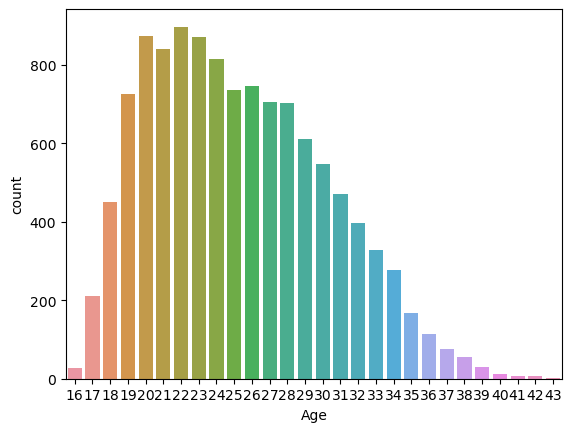

In [24]:
sns.countplot(x="Age", data=fifa2)

In [25]:
pd.set_option('display.max_rows', None)

In [26]:
fifa2.dtypes

ID                    int64
Age                   int64
BP                   object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control          int64
Movement              int64
Acceleration          int64
Sprint Speed          int64
Agility             float64
Reactions             int64
Balance             float64
Power                 int64
Shot Power            int64
Jumping             float64
Stamina               int64
Strength              int64
Long Shots            int64
Mentality             int64
Aggression            int64
Interceptions       float64
Positioning         float64
Vision              float64
Penalties             int64
Composure           float64
Defending             int64
Marking             

In [27]:
categorical = fifa2.select_dtypes(include=object)
numerical = fifa2.select_dtypes(include=np.number)

In [28]:
numerical.describe()

,ID,Age,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
count,11701.000000,11701.00000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.00000,11701.000000,11701.000000,11701.000000,11701.000000,11701.00000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000
mean,219436.649004,25.27049,258.482181,51.593795,48.048116,53.494060,60.436800,45.067324,266.497222,57.852491,49.617839,44.358260,54.214683,60.627810,322.617383,65.432527,65.446628,64.582075,62.899838,64.709348,302.083326,59.726348,65.036621,63.214939,65.17084,49.162465,261.704982,56.939065,46.815119,52.48589,55.439194,50.279378,59.947732,140.674558,46.964875,48.042560,45.827702,77.726946,15.604906,15.517734,15.494402,15.543458,15.768310,1629.786599,361.106316,2.982907,2.452782,1.148192,68.095206,55.046406,58.893257,64.223229,50.030254,64.817964,28.698773,56.477310,56.477310,56.477310,57.505598,57.397915,57.397915,57.397915,57.505598,57.687719,57.687719,57.687719,58.120075,56.724981,56.724981,56.724981,58.120075,55.089907,54.677720,54.677720,54.677720,55.089907,54.274421,53.117768,53.117768,53.117768,54.274421,20.765405,66.921972
std,37480.006004,4.95764,72.267012,17.872747,19.399617,16.956195,13.971811,17.701804,76.835287,18.050938,18.148526,17.484142,14.886875,15.886688,55.330054,14.735329,14.516404,14.458950,9.020199,14.106536,49.697749,13.511767,11.996044,15.350014,12.76541,19.058991,62.935298,17.066535,20.801928,19.06376,13.671268,15.713965,11.628692,61.599006,20.190466,21.470841,21.179854,81.221525,16.850815,16.155245,16.005114,16.409881,17.151738,260.766470,40.318331,0.675365,0.782346,0.451875,11.247282,13.851853,10.174939,9.818311,16.841283,9.757873,76.291193,13.067338,13.067338,13.067338,14.057242,13.693624,13.693624,13.693624,14.057242,13.548592,13.548592,13.548592,13.505062,12.737545,12.737545,12.737545,13.505062,13.257255,13.490103,13.490103,13.490103,13.257255,13.542058,14.575321,14.575321,14.575321,13.542058,14.606704,6.876081
min,27.000000,16.00000,33.000000,6.000000,3.000000,5.000000,8.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,13.000000,11.000000,14.000000,24.000000,17.000000,133.000000,12.000000,25.000000,12.000000,20.00000,4.000000,55.000000,9.000000,5.000000,2.00000,10.000000,8.000000,12.000000,17.000000,3.000000,6.000000,6.000000,12.000000,1.000000,2.000000,2.000000,2.000000,1.000000,731.000000,228.000000,1.000000,1.000000,1.000000,26.000000,17.000000,25.000000,28.000000,12.000000,27.000000,3.000000,15.000000,15.000000,15.000000,14.000000,15.000000,15.000000,15.000000,14.000000,16.000000,16.000000,16.000000,15.0000

## Check the correlation

In [29]:
pd.set_option('display.max_rows', 10)

In [30]:
numerical

,ID,Age,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,26,258,54,47,43,70,44.000000,286,61,44.000000,55,63,63,346,64,73,61.000000,66,82.000000,306,62,73.000000,71,55,45,290,54,52.0,62.0,68.000000,54,54.000000,148,49,56,43.000000,48,7,12,14,9,6,1682,357,4,2,1,69,51,63,63,51,60,3.0,58,58,58,61,62,62,62,61,63,63,63,63,63,63,63,63,59,59,59,59,59,58,54,54,54,58,15,64
1,188044,30,365,66,79,76,68,76.000000,375,83,78.000000,72,63,79,404,83,83,88.000000,75,75.000000,372,74,81.000000,75,74,68,313,54,33.0,78.0,72.000000,76,70.000000,77,35,20,22.000000,55,11,7,14,7,16,1961,412,3,4,2,83,75,68,82,33,71,44.0,77,77,77,77,77,77,77,77,76,76,76,76,68,68,68,76,57,53,53,53,57,53,48,48,48,53,18,77
2,184431,33,336,73,76,34,78,75.000000,424,85,89.000000,91,74,85,424,84,76,93.000000,78,93.000000,308,79,34.000000,75,42,78,332,75,26.0,80.0,78.000000,73,82.000000,80,23,29,28.000000,21,6,3,6,3,3,1925,404,4,4,2,80,77,78,86,27,56,73.0,73,73,73,80,79,79,79,80,80,80,80,79,74,74,74,79,59,56,56,56,59,53,41,41,41,53,12,80
3,233796,22,242,44,42,58,62,36.000000,259,54,41.000000,46,57,61,282,54,59,59.000000,55,55.000000,277,57,60.000000,64,58,38,257,61,57.0,31.0,54.000000,54,48.000000,168,55,58,55.000000,42,8,9,6,7,12,1527,329,2,2,1,57,44,54,57,57,60,7.0,50,50,50,51,51,51,51,51,53,53,53,53,56,56,56,53,56,58,58,58,56,57,58,58,58,57,14,59
4,234799,23,249,49,37,61,68,34.000000,280,64,44.000000,45,61,66,324,66,66,61.000000,62,69.000000,280,61,34.000000,81,61,43,294,66,60.0,55.0,64.000000,49,58.000000,185,58,61,66.000000,52,8,9,15,5,15,1664,360,2,3,1,66,44,60,64,60,66,4.0,56,56,56,59,59,59,59,59,61,61,61,62,63,63,63,62,64,64,64,64,64,63,61,61,61,63,15,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11696,232504,25,224,62,24,51,59,28.000000,248,57,49.000000,29,54,59,333,78,73,68.000000,53,61.000000,273,31,72.000000,77,68,25,266,63,59.0,51.0,54.000000,39,46.000000,184,59,64,61.000000,61,13,14,14,6,14,1589,347,3,2,1,75,28,56,59,60,69,3.0,48,48,48,55,52,52,52,55,54,54,54,58,56,56,56,58,63,60,60,60,63,63,61,61,61,63,16,65
11697,214680,27,84,12,14,13,29,16.000000,96,17,15.000000,19,27,18,237,40,40,38.000000,65,54.000000,217,50,59.000000,29,64,15,101,30,22.0,15.0,15.000000,19,56.000000,41,12,16,13.000000,347,72,67,66,70,72,1123,387,2,1,1,72,67,66,72,40,70,3.0,28,28,28,24,26,26,26,24,24,24,24,25,25,25,25,25,25,26,26,26,25,24,26,26,26,24,69,70
11698,221489,22,286,64,66,51,64,41.000000,291,71,57.000000,38,58,67,388,77,76,86.000000,62,87.000000,278,61,71.000000,64,37,45,241,27,25.0,66.0,58.000000,65,58.000000,62,37,12,13.000000,57,13,10,11,7,16,1603,337,3,3,1,76,60,60,72,26,43,6.0,62,62,62,67,65,65,65,67,65,65,65,66,58,58,58,66,49,44,44,44,49,45,35,35,35,45,17,67
11699,146717,26,254,64,66,51,73,45.067324,284,74,49.617839,63,72,75,198,71,72,64.582075,55,64.709348,258,61,65.036621,71,64,62,241,64,61.0,63.0,55.439194,53,59.947732,113,55,58,45.827702,81,9,24,72,24,24,1429,400,3,1,3,72,63,70,72,57,66,3.0,68,68,68,71,68,68,68,71,72,72,72,71,71,71,71,71,66,68,68,68,66,64,60,60,60,64,25,68


In [31]:
corr_matrix = numerical.corr()

In [32]:
pd.set_option('display.max_rows', None)
corr_matrix

,ID,Age,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
ID,1.000000,-0.743300,-0.184562,-0.158963,-0.120736,-0.150396,-0.178036,-0.203959,-0.180929,-0.066402,-0.198348,-0.238994,-0.214572,-0.143138,0.061685,0.167675,0.172767,0.018616,-0.424577,0.041022,-0.225346,-0.282191,-0.137482,0.020978,-0.243263,-0.192355,-0.245963,-0.218794,-0.149205,-0.132886,-0.247868,-0.219419,-0.359943,-0.065151,-0.101460,-0.068081,-0.047446,-0.092354,-0.085942,-0.096737,-0.117828,-0.103957,-0.091541,-0.237836,-0.336128,-0.103090,-0.076881,-0.532602,0.180962,-0.290759,-0.370250,-0.236253,-0.158261,-0.287738,0.033820,-0.168273,-0.168273,-0.168273,-0.125405,-0.149093,-0.149093,-0.149093,-0.125405,-0.160652,-0.160652,-0.160652,-0.128029,-0.199307,-0.199307,-0.199307,-0.128029,-0.120056,-0.186297,-0.186297,-0.186297,-0.120056,-0.112837,-0.155564,-0.155564,-0.155564,-0.112837,-0.116721,-0.431686
Age,-0.743300,1.000000,0.191137,0.159280,0.110223,0.178446,0.185496,0.189475,0.175981,0.044140,0.184563,0.231401,0.230267,0.129641,-0.051802,-0.183392,-0.175948,-0.038443,0.504708,-0.084665,0.314169,0.307396,0.194669,0.069533,0.350674,0.198765,0.278804,0.279280,0.196035,0.128389,0.242756,0.201801,0.413964,0.117902,0.158495,0.109870,0.087331,0.120656,0.116316,0.119441,0.125299,0.129068,0.116089,0.286428,0.417633,0.088939,0.072587,0.402010,-0.176232,0.311175,0.402361,0.242675,0.225285,0.434448,-0.103853,0.177605,0.177605,0.177605,0.117932,0.148203,0.148203,0.148203,0.117932,0.156023,0.156023,0.156023,0.127516,0.216063,0.216063,0.216063,0.127516,0.159610,0.229680,0.229680,0.229680,0.159610,0.156077,0.212682,0.212682,0.212682,0.156077,0.153012,0.519799
Attacking,-0.184562,0.191137,1.000000,0.842204,0.877748,0.705065,0.880607,0.897407,0.928584,0.914303,0.852411,0.778454,0.729526,0.935176,0.692493,0.593533,0.588027,0.641812,0.447733,0.538391,0.823527,0.710530,0.190579,0.665590,0.142324,0.889165,0.888604,0.534502,0.305561,0.908453,0.719743,0.838863,0.707695,0.311367,0.339857,0.307418,0.267935,-0.769826,-0.761378,-0.760690,-0.746389,-0.757429,-0.762198,0.902862,0.425923,0.356096,0.765994,0.232224,0.181119,0.349931,0.370180,0.379978,0.103203,0.107896,0.185897,0.974933,0.974933,0.974933,0.952856,0.962657,0.962657,0.962657,0.952856,0.954244,0.954244,0.954244,0.949149,0.915054,0.915054,0.915054,0.949149,0.715847,0.645383,0.645383,0.645383,0.715847,0.645549,0.489982,0.489982,0.489982,0.645549,-0.739563,0.433092
Crossing,-0.158963,0.159280,0.842204,1.000000,0.645621,0.435570,0.800162,0.674937,0.883624,0.854544,0.831791,0.751382,0.740585,0.834774,0.722357,0.633555,0.601544,0.686850,0.372938,0.619543,0.628841,0.533293,0.091182,0.634695,-0.055725,0.733978,0.797638,0.457167,0.400966,0.778864,0.682732,0.629131,0.590896,0.409057,0.417238,0.404626,0.384012,-0.654928,-0.647155,-0.644804,-0.628339,-0.645034,-0.649351,0.852027,0.485244,0.281773,0.703613,0.185903,0.303331,0.205157,0.504260,0.445988,0.226190,-0.000844,0.162352,0.788600,0.788600,0.788600,0.879982,0.838305,0.838305,0.838305,0.879982,0.857648,0.857648,0.857648,0.896346,0.855182,0.855182,0.855182,0.896346,0.774187,0.662280,0.662280,0.662280,0.774187,0.702035,0.496127,0.496127,0.496127,0.702035,-0.629319,0.390354
Finishing,-0.120736,0.110223,0.877748,0.645621,1.000000,0.455388,0.650934,0.888847,0.786126,0.820629,0.760857,0.695429,0.485792,0.783835,0.639537,0.567471,0.550783,0.624529,0.330846,0.508809,0.696947,0.726205,0.063848,0.472761,0.003737,0.883367,0.673651,0.240675,-0.068253,0.896535,

In [33]:
# Some value are highly correlated (corr=1)
# But we decided to keep them all as we are not sure about the meaning of the acronymes

In [34]:
pd.set_option('display.max_rows', 10)

## Min Max Scaler

In [35]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different

y = fifa2['OVA']
X = fifa2.drop(['OVA'], axis=1)

In [36]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [37]:
X_num.describe()

,ID,Age,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
count,11701.000000,11701.00000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.00000,11701.000000,11701.000000,11701.000000,11701.000000,11701.00000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000
mean,219436.649004,25.27049,258.482181,51.593795,48.048116,53.494060,60.436800,45.067324,266.497222,57.852491,49.617839,44.358260,54.214683,60.627810,322.617383,65.432527,65.446628,64.582075,62.899838,64.709348,302.083326,59.726348,65.036621,63.214939,65.17084,49.162465,261.704982,56.939065,46.815119,52.48589,55.439194,50.279378,59.947732,140.674558,46.964875,48.042560,45.827702,77.726946,15.604906,15.517734,15.494402,15.543458,15.768310,1629.786599,361.106316,2.982907,2.452782,1.148192,68.095206,55.046406,58.893257,64.223229,50.030254,64.817964,28.698773,56.477310,56.477310,56.477310,57.505598,57.397915,57.397915,57.397915,57.505598,57.687719,57.687719,57.687719,58.120075,56.724981,56.724981,56.724981,58.120075,55.089907,54.677720,54.677720,54.677720,55.089907,54.274421,53.117768,53.117768,53.117768,54.274421,20.765405
std,37480.006004,4.95764,72.267012,17.872747,19.399617,16.956195,13.971811,17.701804,76.835287,18.050938,18.148526,17.484142,14.886875,15.886688,55.330054,14.735329,14.516404,14.458950,9.020199,14.106536,49.697749,13.511767,11.996044,15.350014,12.76541,19.058991,62.935298,17.066535,20.801928,19.06376,13.671268,15.713965,11.628692,61.599006,20.190466,21.470841,21.179854,81.221525,16.850815,16.155245,16.005114,16.409881,17.151738,260.766470,40.318331,0.675365,0.782346,0.451875,11.247282,13.851853,10.174939,9.818311,16.841283,9.757873,76.291193,13.067338,13.067338,13.067338,14.057242,13.693624,13.693624,13.693624,14.057242,13.548592,13.548592,13.548592,13.505062,12.737545,12.737545,12.737545,13.505062,13.257255,13.490103,13.490103,13.490103,13.257255,13.542058,14.575321,14.575321,14.575321,13.542058,14.606704
min,27.000000,16.00000,33.000000,6.000000,3.000000,5.000000,8.000000,4.000000,43.000000,5.000000,4.000000,5.000000,9.000000,5.000000,113.000000,13.000000,11.000000,14.000000,24.000000,17.000000,133.000000,12.000000,25.000000,12.000000,20.00000,4.000000,55.000000,9.000000,5.000000,2.00000,10.000000,8.000000,12.000000,17.000000,3.000000,6.000000,6.000000,12.000000,1.000000,2.000000,2.000000,2.000000,1.000000,731.000000,228.000000,1.000000,1.000000,1.000000,26.000000,17.000000,25.000000,28.000000,12.000000,27.000000,3.000000,15.000000,15.000000,15.000000,14.000000,15.000000,15.000000,15.000000,14.000000,16.000000,16.000000,16.000000,15.000000,16.000000,16.000000,16.000000,15.

In [38]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
x_MinMax = pd.DataFrame(x_normalized, columns=X_num.columns)

(11701, 82)


In [39]:
x_MinMax.describe()

,ID,Age,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
count,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000,11701.000000
mean,0.846935,0.343351,0.558124,0.518111,0.489653,0.551069,0.609730,0.477527,0.523413,0.580797,0.506865,0.442228,0.538270,0.611295,0.597201,0.624197,0.640549,0.616855,0.540276,0.596367,0.543676,0.575016,0.571952,0.602529,0.586634,0.501805,0.575780,0.551024,0.464612,0.537084,0.534579,0.491621,0.570806,0.494698,0.493987,0.500507,0.474139,0.153927,0.164100,0.157183,0.156912,0.148829,0.165936,0.571384,0.508039,0.495727,0.363195,0.037048,0.601360,0.500611,0.498430,0.540645,0.493899,0.572999,0.026466,0.545754,0.545754,0.545754,0.557764,0.543563,0.543563,0.543563,0.557764,0.541399,0.541399,0.541399,0.567369,0.557876,0.557876,0.557876,0.567369,0.570693,0.552539,0.552539,0.552539,0.570693,0.583687,0.515525,0.515525,0.515525,0.583687,0.148929
std,0.144675,0.183616,0.178879,0.203099,0.210865,0.192684,0.162463,0.205835,0.179942,0.198362,0.201650,0.196451,0.177225,0.174579,0.157635,0.175421,0.170781,0.176329,0.125281,0.176332,0.159800,0.162792,0.171372,0.180588,0.165785,0.211767,0.175307,0.196167,0.231133,0.202806,0.160838,0.182721,0.138437,0.246396,0.226859,0.255605,0.252141,0.190214,0.189335,0.187852,0.186106,0.180328,0.192716,0.165777,0.153887,0.168841,0.195586,0.112969,0.160675,0.182261,0.149631,0.146542,0.218718,0.147847,0.078570,0.171939,0.171939,0.171939,0.180221,0.175559,0.175559,0.175559,0.180221,0.175956,0.175956,0.175956,0.177698,0.174487,0.174487,0.174487,0.177698,0.184129,0.192716,0.192716,0.192716,0.184129,0.196262,0.202435,0.202435,0.202435,0.196262,0.184895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.787581,0.185185,0.492574,0.397727,0.326087,0.465909,0.558140,0.325581,0.442623,0.527473,0.37777

In [40]:
X_cat

,BP
0,CM
1,ST
2,CAM
3,CDM
4,CDM
...,...
11696,LB
11697,GK
11698,RM
11699,CM


## OneHotEncoder for the categorical column 'BP'

In [41]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat) 
cols = encoder.get_feature_names_out(input_features=X_cat.columns)
#get_feature_names_out to get the name of the columns
print(encoder.categories_)
encoded = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols) #to.array() to change the format to Array
print(encoded)
encoded.head(5)

[array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB',
       'RB', 'RM', 'RW', 'RWB', 'ST'], dtype=object)]
       BP_CB  BP_CDM  BP_CF  BP_CM  BP_GK  BP_LB  BP_LM  BP_LW  BP_LWB  BP_RB  \
0        0.0     0.0    0.0    1.0    0.0    0.0    0.0    0.0     0.0    0.0   
1        0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
2        0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
3        0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
4        0.0     1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
...      ...     ...    ...    ...    ...    ...    ...    ...     ...    ...   
11696    0.0     0.0    0.0    0.0    0.0    1.0    0.0    0.0     0.0    0.0   
11697    0.0     0.0    0.0    0.0    1.0    0.0    0.0    0.0     0.0    0.0   
11698    0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0    0.0   
11699    0.0     0.0    0.0    1.0    0.0    0.0    0.0    0.0   

,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
encoded.dtypes

BP_CB     float64
BP_CDM    float64
BP_CF     float64
BP_CM     float64
BP_GK     float64
           ...   
BP_RB     float64
BP_RM     float64
BP_RW     float64
BP_RWB    float64
BP_ST     float64
Length: 14, dtype: object

## train-test split

In [43]:
# concatenate
X = pd.concat([x_MinMax, encoded], axis=1)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
import math
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [46]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.9132996211116252

In [47]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.9114265541011196

In [48]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
print('mse is: ',mse)
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
print('rmse is: ',rmse)
usefullness = rmse/y_test.mean()
print('usefullness is: ', usefullness)

mse is:  4.194001451363634
rmse is:  2.047926134254757
usefullness is:  0.030760611339324284


In [49]:
# mse => the lower the better
# The model seemed to be quite good

## Test our model - Cleaning the file

In [50]:
fifa_validation = pd.read_csv('fifa21_validate.csv')

In [51]:
pd.set_option('display.max_columns', None)
print(fifa_validation.shape)
fifa_validation.head(5)

(1999, 101)


,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan","6'2""",194lbs,Right,7,"Feb 8, 2018","Jun 30, 2021",€975K,€5K,€0,"Jun 30, 2021 On Loan",230,47,21,62,60,40.0,228,44,43.0,36,51,54,303,60,68,63.0,63,49.0,288,48,77.0,51,87,25,246,68,62.0,38.0,39.0,39,49.0,200,68,67,65.0,56,11,8,15,13,9,1551,334,2 ★,2★,Low,High,1 ★,64,30,50,50,66,74,34,48+2,48+2,48+2,48+0,47+0,47+0,47+0,48+0,48+2,48+2,48+2,50+2,51+2,51+2,51+2,50+2,59+2,61+2,61+2,61+2,59+2,61+2,67+2,67+2,67+2,61+2,16+2,67
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,"5'8""",154lbs,Right,5,"Jan 20, 2020",NaN,€1.2M,€3K,€2.2M,2020 ~ 2020,298,62,60,44,62,70.0,330,76,68.0,56,60,70,375,77,72,83.0,64,79.0,323,76,62.0,63,47,75,286,72,26.0,64.0,64.0,60,65.0,61,19,23,19.0,53,14,13,9,9,8,1726,358,4 ★,3★,High,Low,1 ★,74,67,62,74,24,57,12,64+2,64+2,64+2,68+0,68+0,68+0,68+0,68+0,68+2,68+2,68+2,67+2,61+2,61+2,61+2,67+2,49+2,47+2,47+2,47+2,49+2,45+2,38+2,38+2,38+2,45+2,17+2,68
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,"6'2""",176lbs,Right,17,"Nov 28, 2018",NaN,€120K,€500,€249K,2018 ~ 2020,48,7,5,11,21,4.0,52,6,8.0,8,20,10,165,28,25,33.0,41,38.0,171,40,49.0,22,54,6,76,20,9.0,7.0,26.0,14,31.0,27,8,9,10.0,269,56,52,53,53,55,808,295,2 ★,1★,Medium,Medium,1 ★,56,52,53,55,26,53,3,18+2,18+2,18+2,15+0,17+0,17+0,17+0,15+0,17+2,17+2,17+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,53+2,54
3,255120,N. Kenneh,16,England,Leeds United,CDM,CB CDM RB,Leeds United 2020 ~ 2022,"6'3""",170lbs,Right,23,"Jan 10, 2020",NaN,€160K,€500,€464K,2020 ~ 2022,215,38,31,55,59,32.0,224,51,34.0,38,47,54,275,59,58,56.0,48,54.0,242,48,48.0,60,58,28,230,61,55.0,33.0,40.0,41,59.0,159,53,52,54.0,36,7,5,13,5,6,1381,303,3 ★,2★,Medium,Medium,1 ★,58,34,47,52,53,59,6,46+2,46+2,46+2,47+0,46+0,46+0,46+0,47+0,47+2,47+2,47+2,49+2,49+2,49+2,49+2,49+2,53+2,54+2,54+2,54+2,53+2,53+2,54+2,54+2,54+2,53+2,11+2,55
4,215556,E. Fernandes,24,Switzerland,1. FSV Mainz 05,CDM,CM CDM,1. FSV Mainz 05 2019 ~ 2023,"6'2""",170lbs,Right,5,"Jul 1, 2019",NaN,€2.3M,€13K,€4.3M,2019 ~ 2023,295,57,59,45,78,56.0,327,71,57.0,51,74,74,320,68,66,66.0,64,56.0,337,73,56.0,74,72,62,314,66,78.0,53.0,62.0,55,63.0,211,72,68,71.0,60,12,7,13,15,13,1864,407,4 ★,2★,Medium,Medium,1 ★,67,62,68,70,69,71,45,63+2,63+2,63+2,66+0,66+0,66+0,66+0,66+0,68+2,68+2,68+2,67+2,70+2,70+2,70+2,67+2,70+2,72+2,72+2,72+2,70+2,69+2,68+2,68+2,68+2,69+2,18+2,70


In [52]:
fifa_validation= fifa_validation.drop(['Name', 'Nationality','Club', 'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Position','Release Clause', 'Contract', 'Wage', 'Value', 'A/W', 'D/W'], axis=1)

In [53]:
fifa_validation['W/F'] = fifa_validation['W/F'].apply(remove_star)
fifa_validation['IR'] = fifa_validation['IR'].apply(remove_star)
fifa_validation['SM'] = fifa_validation['SM'].apply(remove_star)

In [54]:
fifa_validation['W/F'] =  pd.to_numeric(fifa_validation['W/F'], errors='coerce')
fifa_validation['IR'] =  pd.to_numeric(fifa_validation['IR'], errors='coerce')
fifa_validation['SM'] =  pd.to_numeric(fifa_validation['SM'], errors='coerce')
fifa_validation['Hits'] =  pd.to_numeric(fifa_validation['Hits'], errors='coerce')
fifa_validation['Hits'].dtypes

dtype('float64')

In [55]:
extract_and_replace_numeric(fifa_validation, columns_to_process)

In [56]:
fifa_validation.isna().sum().sum()

80

In [57]:
for column in columns_to_replace_nan:
    mean_value = fifa_validation[column].mean()
    fifa_validation[column]= fifa_validation[column].fillna(mean_value)

In [58]:
fifa_validation.shape

(1999, 84)

In [59]:
fifa_validation.head(5)

,ID,Age,BP,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,219461,23,CB,230,47,21,62,60,40.0,228,44,43.0,36,51,54,303,60,68,63.0,63,49.0,288,48,77.0,51,87,25,246,68,62.0,38.0,39.0,39,49.0,200,68,67,65.0,56,11,8,15,13,9,1551,334,2,2,1,64,30,50,50,66,74,34.0,48,48,48,48,47,47,47,48,48,48,48,50,51,51,51,50,59,61,61,61,59,61,67,67,67,61,16,67
1,221896,22,CAM,298,62,60,44,62,70.0,330,76,68.0,56,60,70,375,77,72,83.0,64,79.0,323,76,62.0,63,47,75,286,72,26.0,64.0,64.0,60,65.0,61,19,23,19.0,53,14,13,9,9,8,1726,358,4,3,1,74,67,62,74,24,57,12.0,64,64,64,68,68,68,68,68,68,68,68,67,61,61,61,67,49,47,47,47,49,45,38,38,38,45,17,68
2,247428,19,GK,48,7,5,11,21,4.0,52,6,8.0,8,20,10,165,28,25,33.0,41,38.0,171,40,49.0,22,54,6,76,20,9.0,7.0,26.0,14,31.0,27,8,9,10.0,269,56,52,53,53,55,808,295,2,1,1,56,52,53,55,26,53,3.0,18,18,18,15,17,17,17,15,17,17,17,16,18,18,18,16,16,18,18,18,16,16,18,18,18,16,53,54
3,255120,16,CDM,215,38,31,55,59,32.0,224,51,34.0,38,47,54,275,59,58,56.0,48,54.0,242,48,48.0,60,58,28,230,61,55.0,33.0,40.0,41,59.0,159,53,52,54.0,36,7,5,13,5,6,1381,303,3,2,1,58,34,47,52,53,59,6.0,46,46,46,47,46,46,46,47,47,47,47,49,49,49,49,49,53,54,54,54,53,53,54,54,54,53,11,55
4,215556,24,CDM,295,57,59,45,78,56.0,327,71,57.0,51,74,74,320,68,66,66.0,64,56.0,337,73,56.0,74,72,62,314,66,78.0,53.0,62.0,55,63.0,211,72,68,71.0,60,12,7,13,15,13,1864,407,4,2,1,67,62,68,70,69,71,45.0,63,63,63,66,66,66,66,66,68,68,68,67,70,70,70,67,70,72,72,72,70,69,68,68,68,69,18,70


In [60]:
fifa_validation.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [61]:
fifa_validation.shape

(1999, 84)

## Encoding the fifa for validation

In [ ]:
# Separate

In [62]:
y_validate = fifa_validation['OVA']
X_validate = fifa_validation.drop(['OVA'], axis=1)
print(y_validate.shape)

(1999,)


In [63]:
X_num_validate = X_validate.select_dtypes(include = np.number)
X_cat_validate = X_validate.select_dtypes(include = object)
X_num_validate.shape

(1999, 82)

In [64]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(drop='first').fit(X_cat) 
# cols = encoder.get_feature_names_out(input_features=X_cat.columns)
# #get_feature_names_out to get the name of the columns
# print(encoder.categories_)
# encoded = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols) #to.array() to change the format to Array
# print(encoded)
# encoded.head(5)

onehot_encoded_validate = pd.DataFrame(encoder.transform(X_cat_validate).toarray(), columns=cols)
print(encoder.categories_)
print(onehot_encoded_validate.shape)
onehot_encoded_validate.head()


[array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB',
       'RB', 'RM', 'RW', 'RWB', 'ST'], dtype=object)]
(1999, 14)


,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# transformer = MinMaxScaler().fit(X_num)
# x_normalized = transformer.transform(X_num)
# print(x_normalized.shape)
# x_normalized
# x_MinMax = pd.DataFrame(x_normalized, columns=X_num.columns)

X_num_validate_normalized = transformer.transform(X_num_validate)
X_num_validate_normalized = pd.DataFrame(X_num_validate_normalized,columns=X_num_validate.columns)

In [66]:
#merge back all of our labels
X_for_validation = pd.concat([X_num_validate_normalized, onehot_encoded_validate], axis=1)
X_for_validation.head()

,ID,Age,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST
0,0.847029,0.259259,0.487624,0.465909,0.195652,0.647727,0.604651,0.418605,0.433255,0.428571,0.433333,0.348315,0.500000,0.538462,0.541311,0.559524,0.670588,0.597561,0.541667,0.4000,0.498392,0.433735,0.742857,0.458824,0.870130,0.233333,0.532033,0.678161,0.633333,0.382979,0.341176,0.360465,0.440476,0.732,0.730337,0.726190,0.702381,0.103044,0.112360,0.069767,0.151163,0.120879,0.089888,0.521297,0.404580,0.25,0.25,0.0,0.542857,0.171053,0.367647,0.328358,0.701299,0.712121,0.031926,0.434211,0.434211,0.434211,0.435897,0.410256,0.410256,0.410256,0.435897,0.415584,0.415584,0.415584,0.460526,0.479452,0.479452,0.479452,0.460526,0.625000,0.642857,0.642857,0.642857,0.625000,0.681159,0.708333,0.708333,0.708333,0.681159,0.088608,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.856429,0.222222,0.655941,0.636364,0.619565,0.443182,0.627907,0.767442,0.672131,0.780220,0.711111,0.573034,0.607143,0.714286,0.746439,0.761905,0.717647,0.841463,0.555556,0.7750,0.610932,0.771084,0.528571,0.600000,0.350649,0.788889,0.643454,0.724138,0.233333,0.659574,0.635294,0.604651,0.630952,0.176,0.179775,0.202381,0.154762,0.096019,0.146067,0.127907,0.081395,0.076923,0.078652,0.632549,0.496183,0.75,0.50,0.0,0.685714,0.657895,0.544118,0.686567,0.155844,0.454545,0.009269,0.644737,0.644737,0.644737,0.692308,0.679487,0.679487,0.679487,0.692308,0.675325,0.675325,0.675325,0.684211,0.616438,0.616438,0.616438,0.684211,0.486111,0.442857,0.442857,0.442857,0.486111,0.449275,0.305556,0.305556,0.305556,0.449275,0.101266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.954984,0.111111,0.037129,0.011364,0.021739,0.068182,0.151163,0.000000,0.021077,0.010989,0.044444,0.033708,0.130952,0.054945,0.148148,0.178571,0.164706,0.231707,0.236111,0.2625,0.122186,0.337349,0.342857,0.117647,0.441558,0.022222,0.058496,0.126437,0.044444,0.053191,0.188235,0.069767,0.226190,0.040,0.056180,0.035714,0.047619,0.601874,0.617978,0.581395,0.593023,0.560440,0.606742,0.048951,0.255725,0.25,0.00,0.0,0.428571,0.460526,0.411765,0.402985,0.181818,0.393939,0.000000,0.039474,0.039474,0.039474,0.012821,0.025641,0.025641,0.025641,0.012821,0.012987,0.012987,0.012987,0.013158,0.027397,0.027397,0.027397,0.013158,0.027778,0.028571,0.028571,0.028571,0.027778,0.028986,0.027778,0.027778,0.027778,0.028986,0.556962,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.984676,0.000000,0.450495,0.363636,0.304348,0.568182,0.593023,0.325581,0.423888,0.505495,0.333333,0.370787,0.452381,0.538462,0.461538,0.547619,0.552941,0.512195,0.333333,0.4625,0.350482,0.433735,0.328571,0.564706,0.493506,0.266667,0.487465,0.597701,0.555556,0.329787,0.352941,0.383721,0.559524,0.568,0.561798,0.547619,0.571429,0.056206,0.067416,0.034884,0.127907,0.032967,0.056180,0.413223,0.286260,0.50,0.25,0.0,0.457143,0.223684,0.323529,0.358209,0.532468,0.484848,0.003090,0.407895,0.407895,0.407895,0.423077,0.397436,0.397436,0.397436,0.423077,0.402597,0.402597,0.402597,0.447368,0.452055,0.452055,0.452055,0.447368,0.541667,0.542857,0.542857,0.542857,0.541667,0.565217,0.527778,0.527778,0.527778,0.565217,0.025316,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.831956,0.296296,0.648515,0.579545,0.608696,0.454545,0.813953,0.604651,0.665105,0.725275,0.588889,0.516854,0.773810,0.758242,0.589744,0.654762,0.647059,0.634146,0.555556,0.4875,0.655949,0.734940,0.4

In [67]:
#predict and inspect results
results_for_validation = lm.predict(X_for_validation)

result = pd.concat([fifa_validation,pd.Series(results_for_validation, name='estimate_OVA')],axis=1)

In [69]:
results_for_validation

array([65.08935547, 65.41516113, 53.38589478, ..., 73.73072815,
       63.60366821, 61.40065002])

In [70]:
Result

,ID,Age,BP,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA,estimate OVA
0,219461,23,CB,230,47,21,62,60,40.0,228,44,43.0,36,51,54,303,60,68,63.0,63,49.0,288,48,77.0,51,87,25,246,68,62.0,38.0,39.0,39,49.0,200,68,67,65.0,56,11,8,15,13,9,1551,334,2,2,1,64,30,50,50,66,74,34.0,48,48,48,48,47,47,47,48,48,48,48,50,51,51,51,50,59,61,61,61,59,61,67,67,67,61,16,67,65.089355
1,221896,22,CAM,298,62,60,44,62,70.0,330,76,68.0,56,60,70,375,77,72,83.0,64,79.0,323,76,62.0,63,47,75,286,72,26.0,64.0,64.0,60,65.0,61,19,23,19.0,53,14,13,9,9,8,1726,358,4,3,1,74,67,62,74,24,57,12.0,64,64,64,68,68,68,68,68,68,68,68,67,61,61,61,67,49,47,47,47,49,45,38,38,38,45,17,68,65.415161
2,247428,19,GK,48,7,5,11,21,4.0,52,6,8.0,8,20,10,165,28,25,33.0,41,38.0,171,40,49.0,22,54,6,76,20,9.0,7.0,26.0,14,31.0,27,8,9,10.0,269,56,52,53,53,55,808,295,2,1,1,56,52,53,55,26,53,3.0,18,18,18,15,17,17,17,15,17,17,17,16,18,18,18,16,16,18,18,18,16,16,18,18,18,16,53,54,53.385895
3,255120,16,CDM,215,38,31,55,59,32.0,224,51,34.0,38,47,54,275,59,58,56.0,48,54.0,242,48,48.0,60,58,28,230,61,55.0,33.0,40.0,41,59.0,159,53,52,54.0,36,7,5,13,5,6,1381,303,3,2,1,58,34,47,52,53,59,6.0,46,46,46,47,46,46,46,47,47,47,47,49,49,49,49,49,53,54,54,54,53,53,54,54,54,53,11,55,57.295486
4,215556,24,CDM,295,57,59,45,78,56.0,327,71,57.0,51,74,74,320,68,66,66.0,64,56.0,337,73,56.0,74,72,62,314,66,78.0,53.0,62.0,55,63.0,211,72,68,71.0,60,12,7,13,15,13,1864,407,4,2,1,67,62,68,70,69,71,45.0,63,63,63,66,66,66,66,66,68,68,68,67,70,70,70,67,70,72,72,72,70,69,68,68,68,69,18,70,69.679901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,239074,21,LB,197,59,23,42,51,22.0,207,51,30.0,29,41,56,344,74,78,63.0,50,79.0,245,31,66.0,68,50,30,232,59,52.0,51.0,34.0,36,59.0,167,52,57,58.0,51,6,15,7,10,13,1443,315,3,2,1,76,28,46,55,53,57,4.0,44,44,44,51,48,48,48,51,48,48,48,53,48,48,48,53,58,52,52,52,58,58,54,54,54,58,15,60,58.331894
1995,241223,21,GK,77,13,9,14,34,7.0,70,9,13.0,10,25,13,192,31,30,36.0,59,36.0,177,43,44.0,23,60,7,88,21,8.0,4.0,36.0,19,33.0,36,14,11,11.0,288,60,55,57,54,62,928,318,2,1,1,60,55,57,62,30,54,3.0,22,22,22,20,22,22,22,20,23,23,23,22,24,24,24,22,20,23,23,23,20,20,22,22,22,20,58,59,60.985992
1996,210930,27,RM,332,76,72,34,79,71.0,373,77,76.0,65,77,78,351,64,65,74.0,73,75.0,329,63,60.0,83,57,66,306,41,40.0,75.0,81.0,69,75.0,118,36,43,39.0,58,12,15,16,9,6,1867,388,4,4,2,65,69,78,77,39,60,15.0,67,67,67,74,73,73,73,74,76,76,76,75,74,74,74,75,62,60,60,60,62,57,47,47,47,57,18,76,73.730728
1997,162993,34,CDM,268,58,44,61,62,43.0,261,56,47.0,37,60,61,288,54,52,57.0,61,64.0,300,53,65.0,68,68,46,297,74,62.0,54.0,56.0,51,60.0,182,61,62,59.0,43,10,7,9,9,8,1639,346,3,2,1,53,47,58,58,61,69,4.0,55,55,55,56,55,55,55,56,57,57,57,57,59,59,59,57,60,62,62,62,60,60,63,63,63,60,14,63,63.603668


In [71]:
Result.shape

(1999, 85)

In [72]:
r2_score(Result['OVA'], Result['estimate OVA'])

-304019602179297.0